In [ ]:
import os
from pathlib import Path 
import pandas as pd, numpy as np, datetime 
import matplotlib.pyplot as plt, seaborn as sns 
import plotly.graph_objects as go
from utils.fipi_lipi_processor import FIPIDataProcessor
from config.config import (FIPI_DIR, LIPI_DIR, PROCESSED_FIPI_LIPI_DIR, STOCKS_DIR, RAW_STOCKS_DIR)

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (18, 6)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 300
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)


%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [20]:
dir_dict = {FIPI_DIR: 'fipi', LIPI_DIR: 'lipi'}

def merge_data(directories):
    merged_data = pd.DataFrame()

    # Iterate through each directory and type in dir_dict
    for dir_, types_ in directories.items():
        processor = FIPIDataProcessor(dir_, types_)
        data = processor.process_files()  # Make sure this returns a DataFrame
        
        # Only concatenate if `data` is not empty
        if not data.empty:
            merged_data = pd.concat([merged_data, data], ignore_index=True)
    
    return merged_data

merged_df = merge_data(dir_dict)

Scanning directory: 2019 : D:\fund_tracker_psx\data\fipi\2019
Scanning directory: 2020 : D:\fund_tracker_psx\data\fipi\2020
Scanning directory: 2021 : D:\fund_tracker_psx\data\fipi\2021
Scanning directory: 2022 : D:\fund_tracker_psx\data\fipi\2022
Scanning directory: 2023 : D:\fund_tracker_psx\data\fipi\2023
Scanning directory: 2024 : D:\fund_tracker_psx\data\fipi\2024
Scanning directory: 2019 : D:\fund_tracker_psx\data\lipi\2019
Scanning directory: 2020 : D:\fund_tracker_psx\data\lipi\2020
Scanning directory: 2021 : D:\fund_tracker_psx\data\lipi\2021
Scanning directory: 2022 : D:\fund_tracker_psx\data\lipi\2022
Scanning directory: 2023 : D:\fund_tracker_psx\data\lipi\2023
Scanning directory: 2024 : D:\fund_tracker_psx\data\lipi\2024


<BarContainer object of 5977 artists>

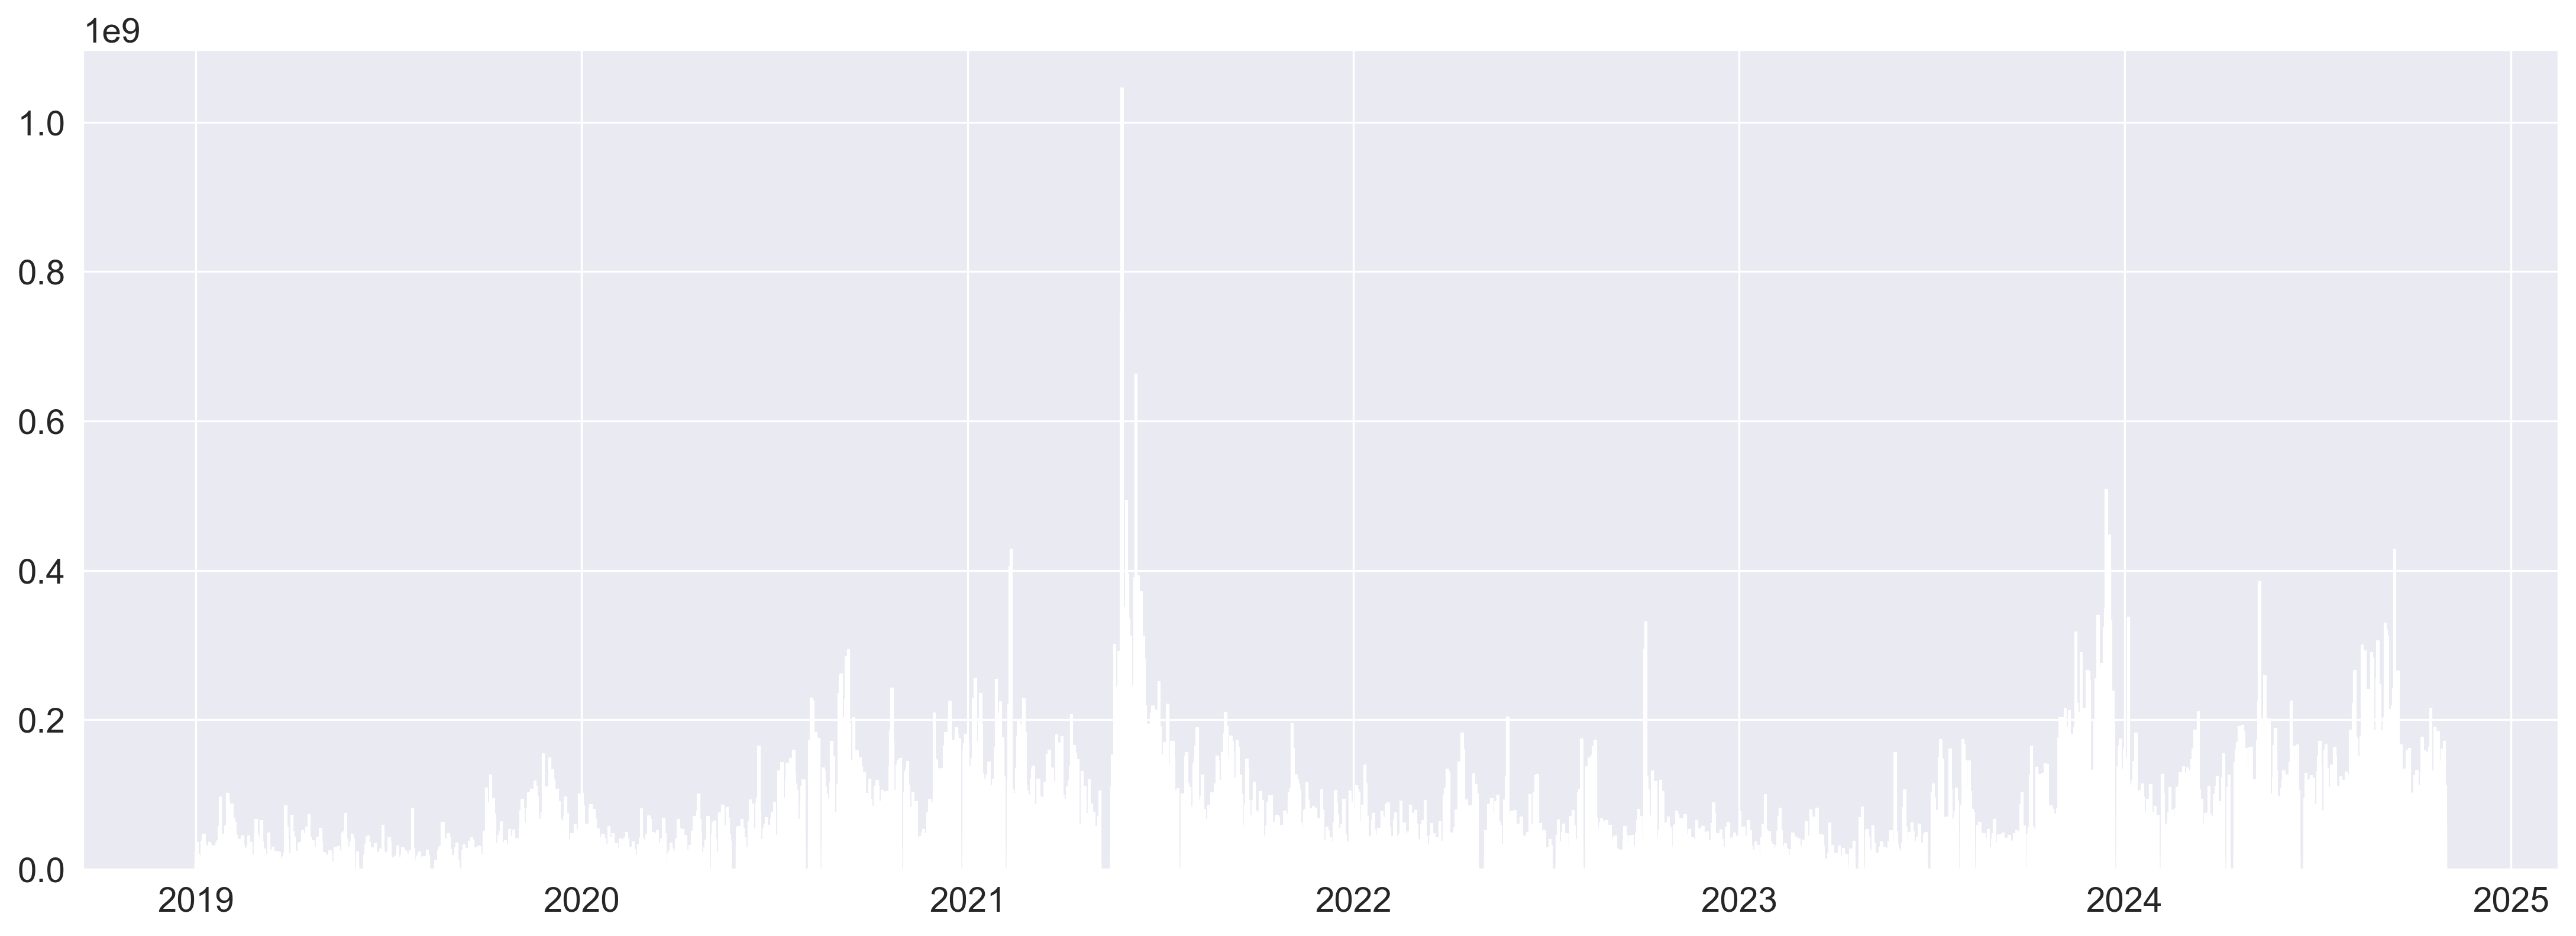

In [24]:
individual_buy = merged_df[merged_df['CLIENT TYPE'] == 'INDIVIDUALS']
foreign_individual_buy = merged_df[merged_df['CLIENT TYPE'] == 'FOREIGN INDIVIDUAL']

plt.bar(individual_buy['Date'], individual_buy['BUY VOLUME'])
plt.bar(foreign_individual_buy['Date'], foreign_individual_buy['BUY VOLUME'])

<BarContainer object of 5977 artists>

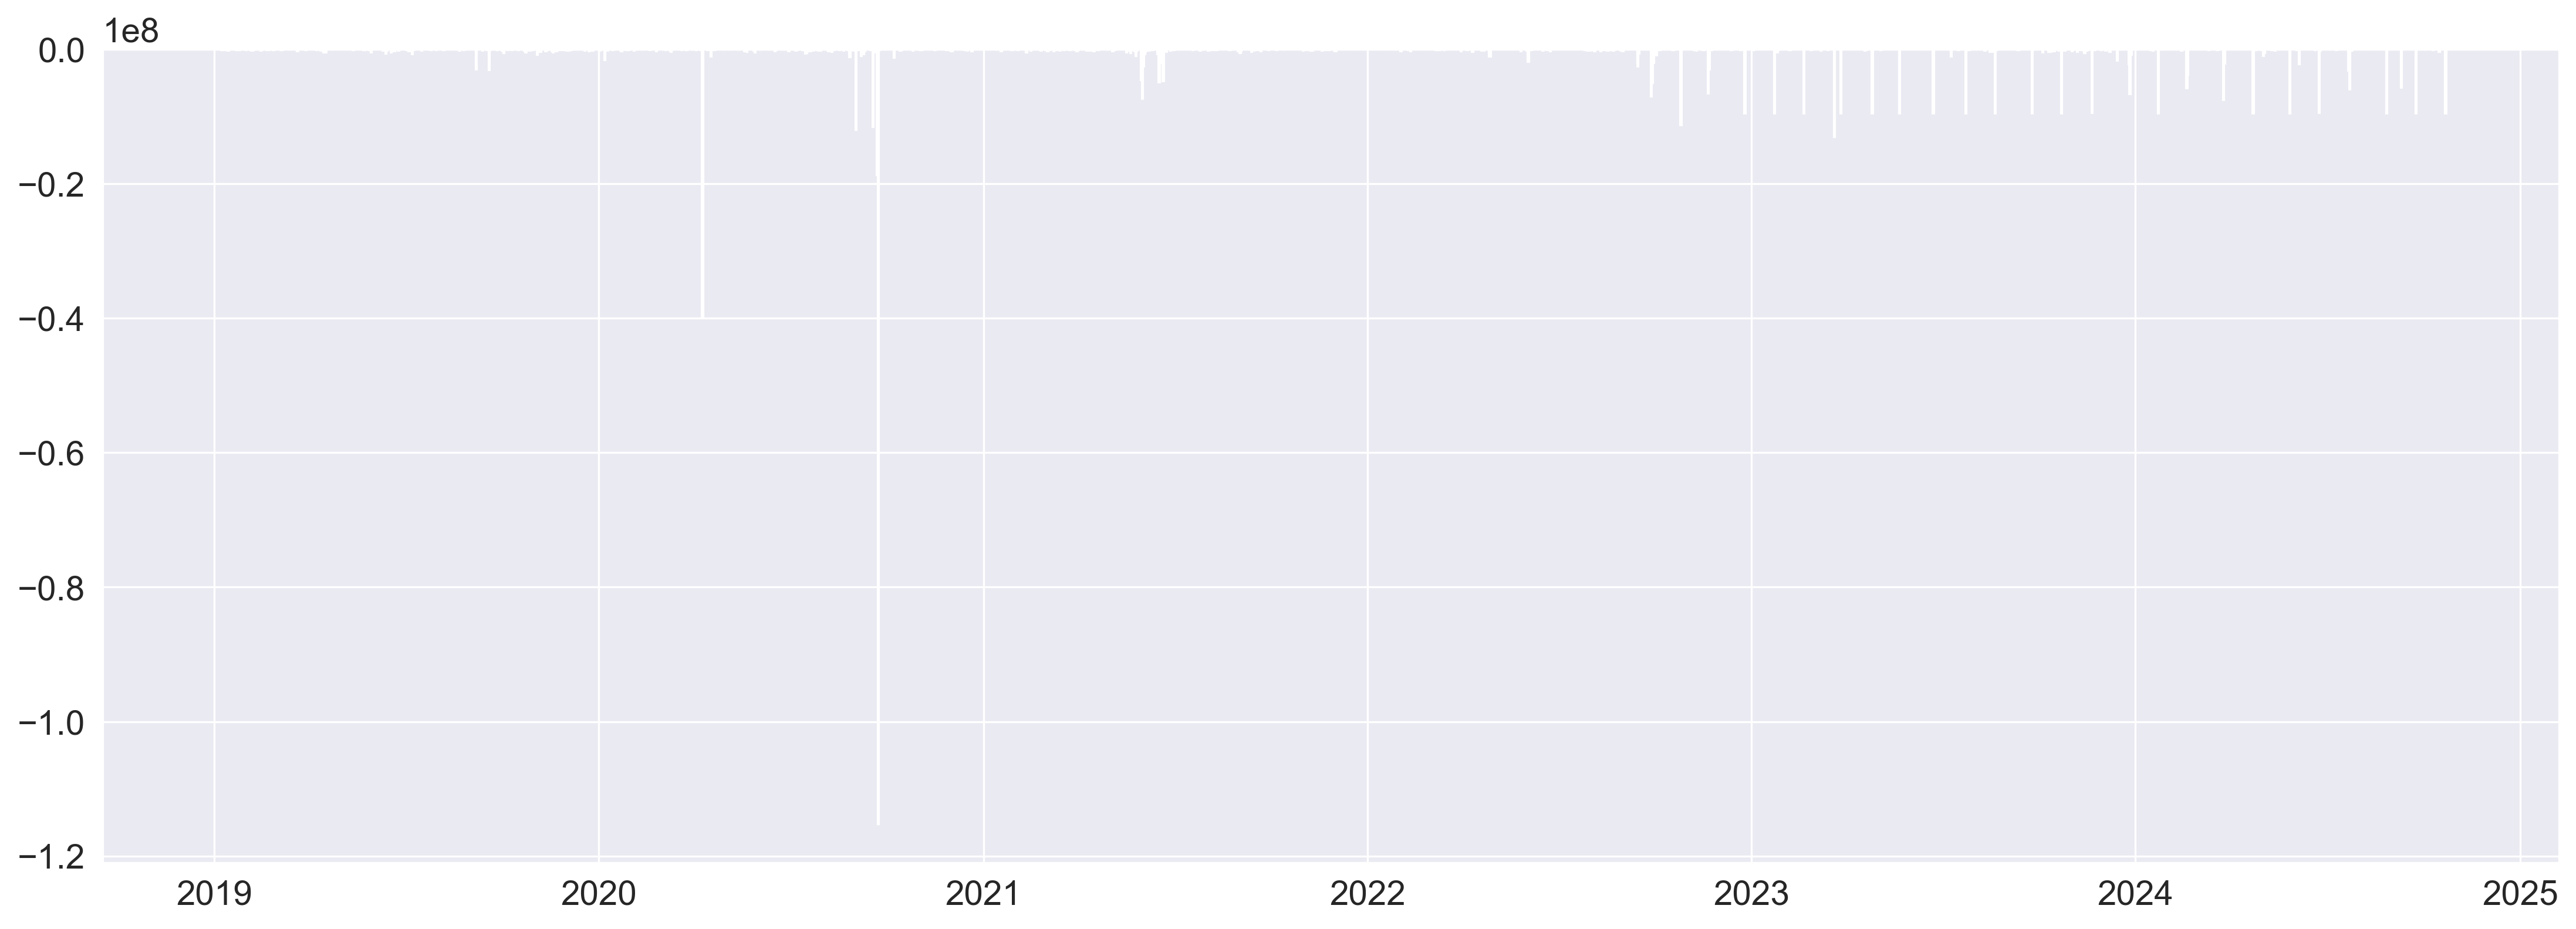

In [27]:
plt.bar(foreign_individual_buy['Date'], foreign_individual_buy['SELL VOLUME'])

<BarContainer object of 267743 artists>

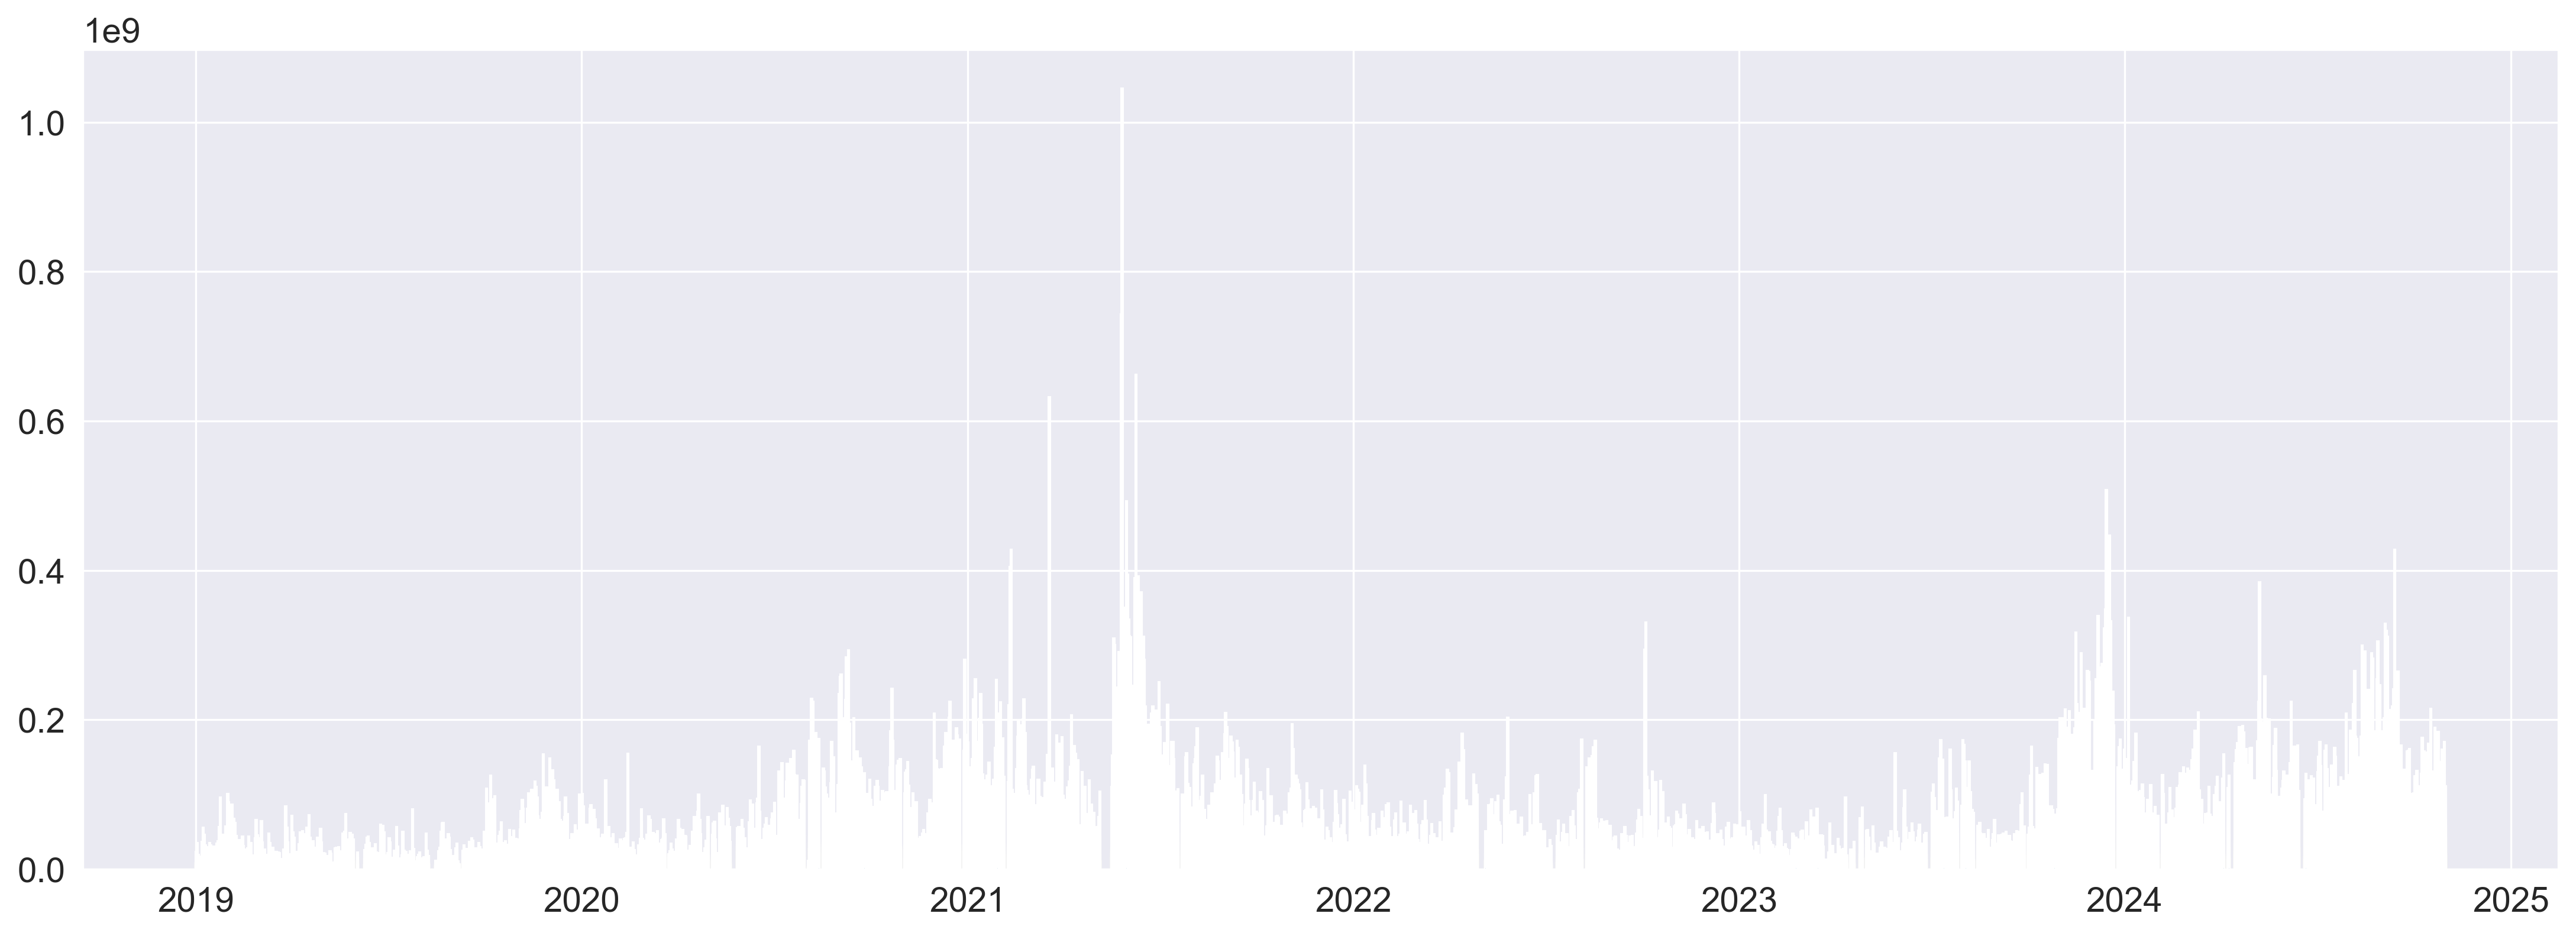

In [ ]:
plt.bar(merged_df['Date'], merged_df['BUY VOLUME'])

In [4]:
import plotly.graph_objs as go
import plotly.io as pio

# Assuming `merged_data` is your DataFrame
# Filter data for FOREIGN INDIVIDUAL and INDIVIDUALS (local)
foreign_individual_data = merged_data[merged_data['CLIENT TYPE'] == 'FOREIGN INDIVIDUAL']
local_individual_data = merged_data[merged_data['CLIENT TYPE'] == 'INDIVIDUALS']

# Create traces for each client type
trace_foreign = go.Scatter(
    x=foreign_individual_data['Date'],
    y=foreign_individual_data['NET VOLUME'],
    mode='lines',
    name='Foreign Individual',
    line=dict(color='blue')
)

trace_local = go.Scatter(
    x=local_individual_data['Date'],
    y=local_individual_data['NET VOLUME'],
    mode='lines',
    name='Local Individual',
    line=dict(color='orange')
)

# Combine the traces
data = [trace_foreign, trace_local]

# Define the layout
layout = go.Layout(
    title="NET VOLUME Comparison: Foreign Individual vs Local Individual",
    xaxis=dict(title='Date'),
    yaxis=dict(title='NET VOLUME'),
    hovermode='x unified'  # Shows all data points on the same x-value when hovering
)

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
fig.show()


In [30]:
import plotly.express as px

px.bar(foreign_individual_buy, x='Date', y='NET VOLUME', color='NET VALUE', title='NET VOLUME Comparison: Foreign Individual vs Local Individual')

In [49]:
company_data = Path(PROCESSED_FIPI_LIPI_DIR) / 'COMPANY DATA EXCEL.xlsx'
filter_listed_comp_name = Path(PROCESSED_FIPI_LIPI_DIR) /'stocks_name_code_lotsize_industry_code.csv'

In [50]:
data_excel = pd.read_excel(r'data\stocks\DATA EXCEL.xlsx', header=None)
data_excel.rename(columns={0:'Symbol'}, inplace=True)

In [28]:
comp_name = pd.read_csv(filter_listed_comp_name)
comp_name_active = pd.read_excel(company_data, header=None)

In [ ]:
raw_stock_dir = Path(STOCKS_DIR)